In [1]:
import sympy
sympy.init_printing()

In [24]:
x_t, t, u, x_hat, u_hat, sigma_x, sigma_v, sigma_L, w = sympy.symbols('x_t t u \hat{x} \hat{u} \sigma_x \sigma_v \sigma_L w')
G1 = sympy.exp( -(x_hat - x_t - t*u)**2 / (2*sigma_x**2))
G2 = sympy.exp( -(u_hat - u)**2 / (2*(sigma_v)**2))
G3 = sympy.exp( -u**2/ (2*sigma_L**2))

In [25]:
integrand = sympy.simplify(G1*G2*G3)

In [26]:
to_solve = sympy.Integral( integrand, (u, (x_t-w/2)/t, (x_t+w/2)/t ) )

We want to solve the integral:

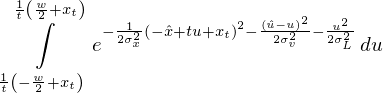

In [27]:
to_solve

In [29]:
exponent = -(u_hat-u)**2 / (2*sigma_v**2) - (t*u+x_t - x_hat)**2 / (2*sigma_x**2) - u**2 / (2*sigma_L**2)
print sympy.exp( exponent) == integrand

True


Now let's put the exponent into a negative quadratic form by completing the square.

In [30]:
def complete_the_square(q):
    """ Takes a quadratic polynomial and completes the square"""
    assert(q.degree() == 2)
    a,b,c = q.coeffs()
    h = sympy.expand( sympy.simplify(-b / (2*a)) )
    k = sympy.expand(c - a*h**2)
    return a,h,k

In [31]:
a,h,k = complete_the_square( sympy.Poly(exponent,u) )
a,h,k = [ sympy.simplify(_) for _ in [a,h,k] ]
print sympy.expand(exponent) == sympy.simplify( sympy.expand(a*(u-h)**2 + k))

True


Now that we've written the exponent in the form $a(u-h)+k$ we have transformed the integral into solving
$$
  I = \int_{u_{\min}}^{u_{\max}} e^{a(x-h)^2 + k} du = e^k \int_{u_{\min}-h}^{u_{\max}-h} e^{au^2} du
$$

We can integrate with respect to $u$ to get our desired integral.  First note that

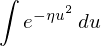

In [35]:
sympy.Integral( sympy.exp( -u**2 * sympy.symbols('eta') ), u)

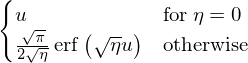

In [37]:
sympy.integrate( sympy.exp( -u**2 * sympy.symbols('eta')),u)

Therefore, the desired integral is
$$
    I = e^k  \left[ \frac{\pi}{2 \sqrt{-a} } {\rm erf}( \sqrt{-a} (u - h) ) \right] \Big|_{u = (x_t - w/2)t^{-1}}^{(x_t+w/2)t^{-1}}
$$
where $a$ $h$ and $k$ are given by

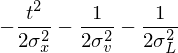

In [39]:
a

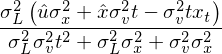

In [40]:
h

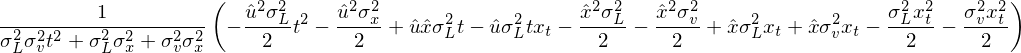

In [41]:
k

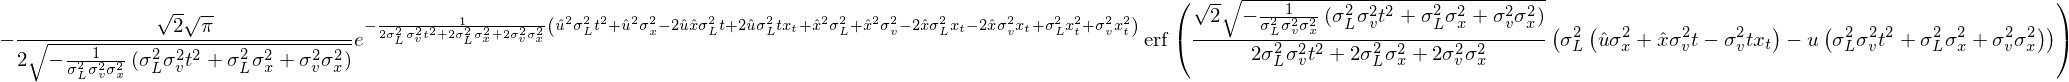

In [38]:
solution = sympy.exp(sympy.simplify(k)) * ( sympy.sqrt(sympy.pi) / (2*sympy.sqrt(a)) ) * sympy.erf( (u-h) * sympy.sqrt(a) )
solution = sympy.simplify(solution)
solution